In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 61.8MB/s]


In [6]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [7]:
df["make"] = df.groupby("make")["selling_price"].transform("mean")
df["model"] = df.groupby("model")["selling_price"].transform("mean")

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
y = df["selling_price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print("Train size:",X_train.shape)
print("Test size:",X_test.shape)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

Train size: (15856, 17)
Test size: (3964, 17)


# Check for Multi-Collinearity

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
variance_inflation_factor?

In [9]:
variance_inflation_factor(X,0)

398.8818071605006

In [10]:
vif_list = [variance_inflation_factor(X,i) for i in range(0,len(X.columns))]

In [12]:
vif_zip = list(zip(X.columns,vif_list))
vif = pd.DataFrame(vif_zip,columns = ["feature","vif"])

In [14]:
vif.sort_values(by = "vif",ascending=False,inplace=True)
vif

,feature,vif
0,year,398.881807
13,Petrol,17.941345
10,Diesel,17.020117
5,age,15.035667
16,>5,13.313234
15,5,12.077658
3,engine,6.313688
7,model,6.203629
4,max_power,5.109717
6,make,3.325129


In [31]:
X2_train = X_train.drop(columns = "year")

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [19]:
model.fit(X2_train,y_train)

LinearRegression()

In [20]:
model.score(X2_train,y_train)

0.9455774133710837

In [35]:
vif_thr = 5
r2_thr = 0.9
feat_removed = ["year"]

while True:
  vif_list = [variance_inflation_factor(X2_train,i) for i in range(0,len(X2_train.columns))]
  vif_zip = list(zip(X2_train.columns,vif_list))
  vif = pd.DataFrame(vif_zip,columns = ["feature","vif"])
  vif.sort_values(by = "vif",ascending=False,inplace=True)

  cols2 = vif.feature[1:].values
  model.fit(X2_train[cols2],y_train)
  r2_score = model.score(X2_train[cols2],y_train)

  vif_sc = vif.iloc[0]["vif"]
  fea = vif.iloc[0]["feature"]

  if (vif_sc<vif_thr) or (r2_score<r2_thr):
    break
  else:
    X2_train.drop(columns = fea,inplace=True)
    feat_removed.append(fea)





In [36]:
feat_removed

['year', 'engine', '5', 'Diesel', 'max_power', 'make', 'mileage']

In [23]:
vif.iloc[0]["vif"]

398.8818071605006

In [29]:
vif.feature[1:].values

array(['Petrol', 'Diesel', 'age', '>5', '5', 'engine', 'model',
       'max_power', 'make', 'mileage', 'Manual', 'LPG', 'km_driven',
       'Electric', 'Individual', 'Trustmark Dealer'], dtype=object)

# Check for Normality of residuals

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_train)

In [40]:
residuals = y_train - y_pred

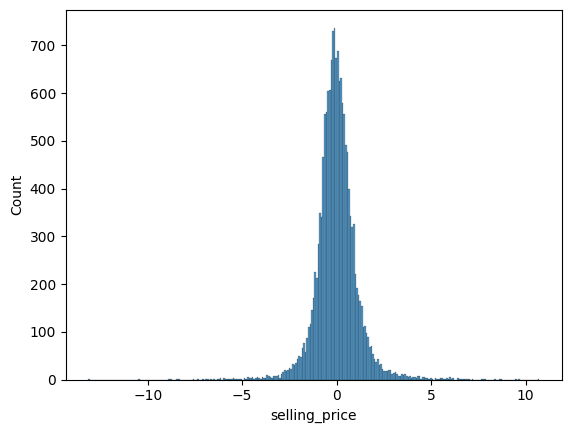

In [41]:
import seaborn as sns

sns.histplot(residuals)
plt.show()

In [42]:
from scipy.stats import shapiro

In [43]:
shapiro?

In [45]:
res = shapiro(residuals)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
res.statistic

0.8953198194503784

# Check for Heteroskedasticity

<Axes: ylabel='selling_price'>

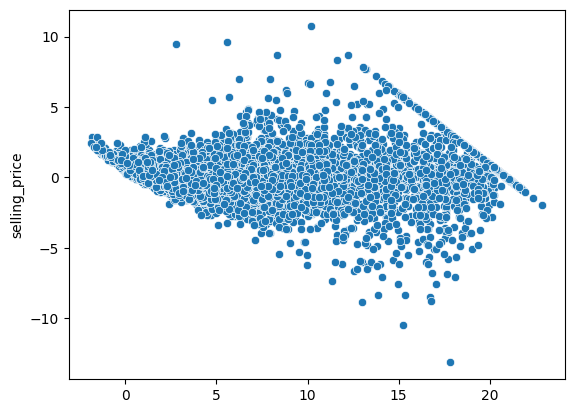

In [47]:
sns.scatterplot(x = y_pred , y = residuals)

In [48]:
#Goldfeld-Quandt Test #check for heteroskadasticity
#H0 = Data is Homoskadastic
from statsmodels.stats.api import het_goldfeldquandt

In [49]:
het_goldfeldquandt?

In [50]:
het_goldfeldquandt(y_train,X_train)

(0.9042764549097988, 0.9999961558479327, 'increasing')

In [51]:
# Data is Homoskedastic